#PRECESSION FARMING PROJECT - GROUP 304

Quick Summary: This notebook houses the modelling information and steps for the precision farming project. The target variable is the harvest_season column.
This is a classification problem, and the best performing model of the Gaussian Naives Bayes model, RandomForest Classifier, XGBoost and KNN is the Gaussian Naves Bayes model, with an accuracy score of 0.9428571428571428.

### DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [1]:
#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv('/content/Crop_Data.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

   temperature   humidity        ph  water availability harvest season label  \
0    20.879744  82.002744  6.502985          202.935536          rainy  rice   
1    21.770462  80.319644  7.038096          226.655537          rainy  rice   
2    23.004459  82.320763  7.840207          263.964248          rainy  rice   
3    26.491096  80.158363  6.980401          242.864034          rainy  rice   
4    20.130175  81.604873  7.628473          262.717340          rainy  rice   

   Country  
0  Nigeria  
1  Nigeria  
2  Nigeria  
3  Nigeria  
4  Nigeria  


In [3]:
# Display the first last rows of the dataset to understand its structure
print(data.tail())

      temperature   humidity        ph  water availability harvest season  \
1395    23.874845  86.792613  6.718725          177.514731          rainy   
1396    23.928879  88.071123  6.880205          154.660874          rainy   
1397    24.814412  81.686889  6.861069          190.788639          rainy   
1398    24.447439  82.286484  6.769346          190.968489          rainy   
1399    26.574217  73.819949  7.261581          159.322307          rainy   

     label       Country  
1395  jute  South Africa  
1396  jute  South Africa  
1397  jute       Nigeria  
1398  jute       Nigeria  
1399  jute  South Africa  


In [4]:
# Display the number of columns and rows present in the dataset
data.shape

(1400, 7)

In [5]:
# Display the datatypes of each columns
data.dtypes

temperature           float64
humidity              float64
ph                    float64
water availability    float64
harvest season         object
label                  object
Country                object
dtype: object

In [6]:
# Display a quick statistical summary of the numerical columns
data.describe()

,temperature,humidity,ph,water availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [7]:
#checking for misising values
print(data.isnull())

      temperature  humidity     ph  water availability  harvest season  label  \
0           False     False  False               False           False  False   
1           False     False  False               False           False  False   
2           False     False  False               False           False  False   
3           False     False  False               False           False  False   
4           False     False  False               False           False  False   
...           ...       ...    ...                 ...             ...    ...   
1395        False     False  False               False           False  False   
1396        False     False  False               False           False  False   
1397        False     False  False               False           False  False   
1398        False     False  False               False           False  False   
1399        False     False  False               False           False  False   

      Country  
0       Fal

In [8]:
#quick sum of the missing values
print(data.isnull().sum())

temperature           0
humidity              0
ph                    0
water availability    0
harvest season        0
label                 0
Country               0
dtype: int64


In [9]:
#checking the unique values in the target column.
data['harvest season'].unique()

array(['rainy', 'winter', 'spring', 'summer'], dtype=object)

In [10]:
#renaming the target column
data.rename(columns={'harvest season': 'harvest_season',}, inplace=True)

In [11]:
#displays the first five rows in the dataset
data.head()

,temperature,humidity,ph,water availability,harvest_season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [12]:
#creating a copy of the dataset for the first model train and test
df = data.copy()
df

,temperature,humidity,ph,water availability,harvest_season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria
...,...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria


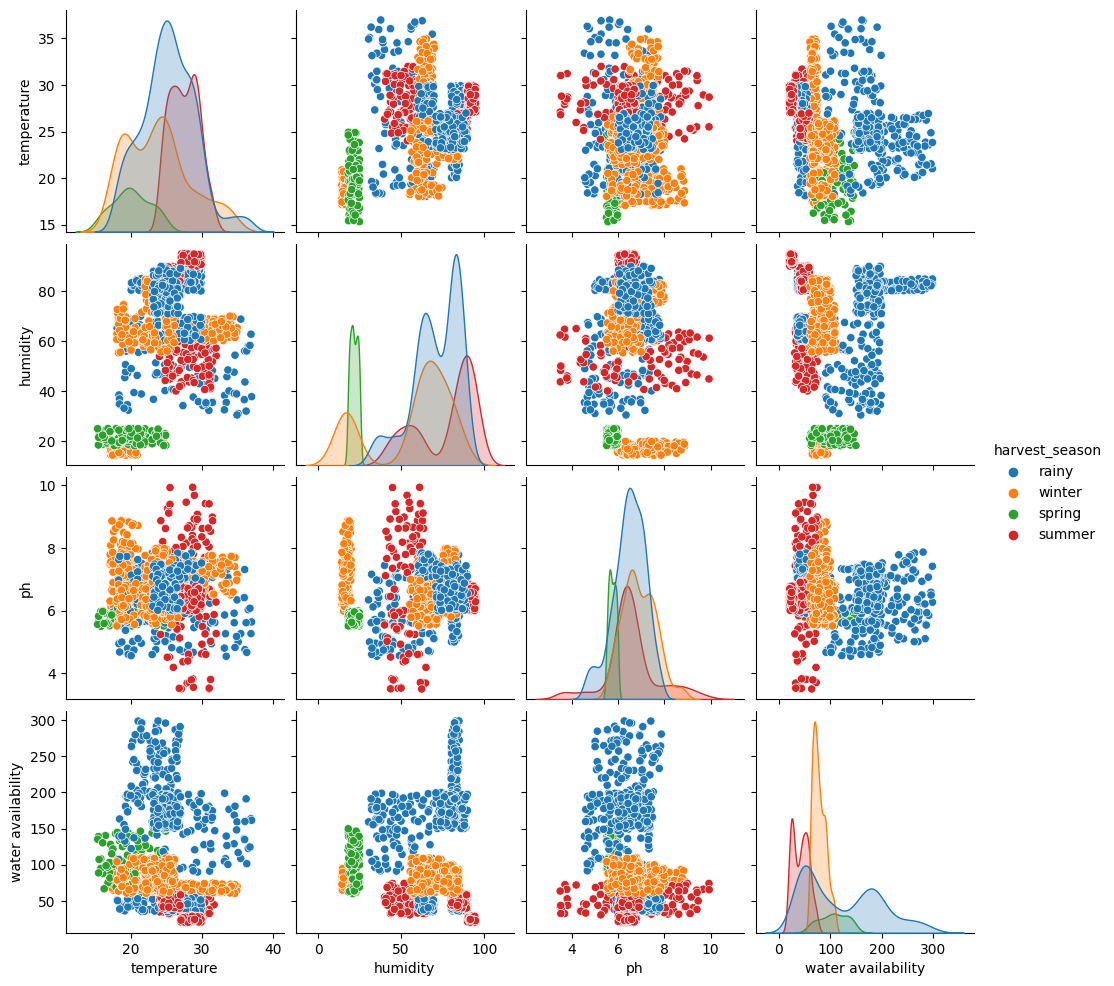

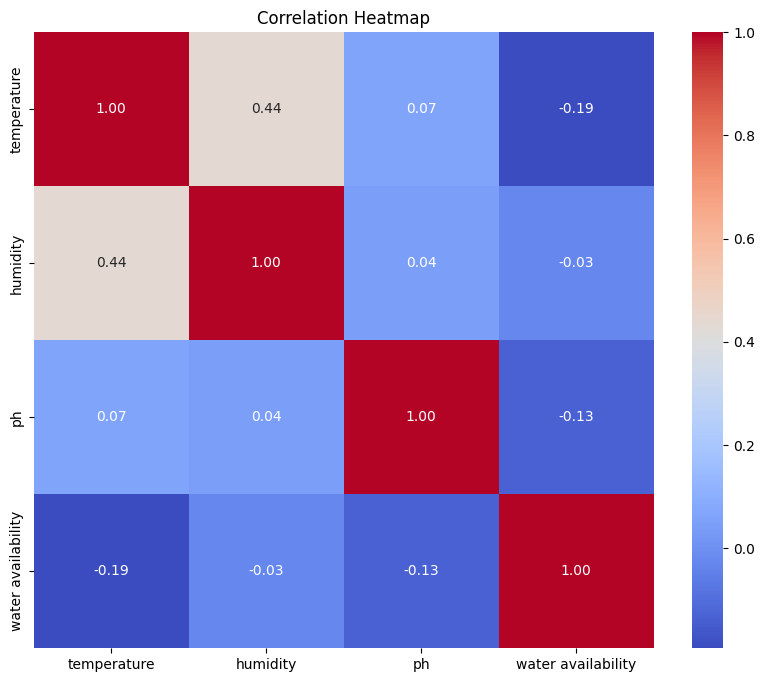

In [13]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df, hue='harvest_season')  # 'harvest_season' is the label column
plt.show()

# Correlation heatmap to identify correlations between numerical features
# Exclude non-numeric columns before generating the correlation heatmap
numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#feature importance with RandomForest
from sklearn.ensemble import RandomForestClassifier

# Assuming 'harvest_season' is the label column and other columns are features
X = df.drop('harvest_season', axis=1)
y = df['harvest_season']

# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X)  # This converts categorical columns into numerical format


# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


water availability      0.203238
humidity                0.139838
label_kidneybeans       0.084606
label_watermelon        0.069617
label_mothbeans         0.069334
label_blackgram         0.060097
temperature             0.054586
label_cotton            0.051063
ph                      0.049963
label_chickpea          0.042387
label_mungbean          0.034785
label_muskmelon         0.033623
label_lentil            0.033342
label_maize             0.023094
label_pigeonpeas        0.017226
label_jute              0.010510
label_rice              0.010115
Country_Nigeria         0.004168
Country_South Africa    0.003787
Country_Kenya           0.002744
Country_Sudan           0.001878
dtype: float64


### MODELLING

In [15]:
#imports for modelling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from scipy import sparse
from joblib import dump, load

Gaussian Naives Bayes model

Loading Preprocessor and integrating it into a Pipeline with Gaussian Naive Bayes Model

In [17]:
# Separating features and target variable
X = df.drop('harvest_season', axis=1)
y = df['harvest_season']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False))
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define columns for transformation
categorical_cols = ['label', 'Country']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Define preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Saving the preprocessor as an artifact
dump(preprocessor, 'preprocessor_artifact.joblib')

# Loading  and fitting the preprocessor
loaded_preprocessor = load('preprocessor_artifact.joblib')
loaded_preprocessor.fit(X_train)

# Transform data using the fitted preprocessor
X_train = loaded_preprocessor.transform(X_train)
X_test = loaded_preprocessor.transform(X_test)

# Create the Gaussian Naive Bayes model within a Pipeline
nb_pipeline = Pipeline([
    ('nb_model', GaussianNB())
])

# Fit the model using the Pipeline
nb_pipeline.fit(X_train.toarray(), y_train)  # Ensure X_train is a dense array

# Predictions and evaluation
y_pred = nb_pipeline.predict(X_test.toarray())  # Ensure X_test is a dense array

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9428571428571428

Classification Report:
              precision    recall  f1-score   support

       rainy       1.00      0.86      0.93       117
      spring       1.00      1.00      1.00        20
      summer       1.00      1.00      1.00        62
      winter       0.84      1.00      0.91        81

    accuracy                           0.94       280
   macro avg       0.96      0.97      0.96       280
weighted avg       0.95      0.94      0.94       280


Confusion Matrix:
[[101   0   0  16]
 [  0  20   0   0]
 [  0   0  62   0]
 [  0   0   0  81]]


RandomForest Classifier

In [18]:
da=data.copy()
da

,temperature,humidity,ph,water availability,harvest_season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria
...,...,...,...,...,...,...,...
1395,23.874845,86.792613,6.718725,177.514731,rainy,jute,South Africa
1396,23.928879,88.071123,6.880205,154.660874,rainy,jute,South Africa
1397,24.814412,81.686889,6.861069,190.788639,rainy,jute,Nigeria
1398,24.447439,82.286484,6.769346,190.968489,rainy,jute,Nigeria


In [19]:
# Assuming the target variable is 'harvest_season'

# Performing one-hot encoding on the , 'label', and 'Country' column
da = pd.get_dummies(da, columns=['label', 'Country'], drop_first=True)

# Separating features and target variable
X = da.drop('harvest_season', axis=1)  # Features (excluding the target column)
y = da['harvest_season']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8857142857142857

Classification Report:
              precision    recall  f1-score   support

       rainy       0.84      0.90      0.87       117
      spring       1.00      1.00      1.00        20
      summer       1.00      1.00      1.00        62
      winter       0.84      0.75      0.79        81

    accuracy                           0.89       280
   macro avg       0.92      0.91      0.91       280
weighted avg       0.89      0.89      0.88       280


Confusion Matrix:
[[105   0   0  12]
 [  0  20   0   0]
 [  0   0  62   0]
 [ 20   0   0  61]]


XGBoost

In [20]:
db = data.copy()
db.head()

,temperature,humidity,ph,water availability,harvest_season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [21]:
# Assuming the target variable is 'harvest_season'

# Performing one-hot encoding on the 'label', and 'Country' column
db = pd.get_dummies(db, columns=['label', 'Country'], drop_first=True)

# Use label encoding to convert categorical classes to numerical values
label_encoder = LabelEncoder()
db['harvest_season'] = label_encoder.fit_transform(db['harvest_season'])

# Separating features and target variable
X = db.drop('harvest_season', axis=1)  # Features (excluding the target column)
y = db['harvest_season']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8571428571428571

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       117
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        62
           3       0.77      0.72      0.74        81

    accuracy                           0.86       280
   macro avg       0.90      0.89      0.89       280
weighted avg       0.86      0.86      0.86       280


Confusion Matrix:
[[100   0   0  17]
 [  0  20   0   0]
 [  0   0  62   0]
 [ 23   0   0  58]]


KNN

In [22]:
dc = data.copy()
dc.head()

,temperature,humidity,ph,water availability,harvest_season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [23]:
# Assuming the target variable is 'harvest_season'

# Performing one-hot encoding on the 'label', 'Country' column
dc = pd.get_dummies(dc, columns=['label', 'Country'], drop_first=True)

# Separating features and target variable
X = dc.drop('harvest_season', axis=1)  # Features (excluding the target column)
y = dc['harvest_season']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (if needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize KNN Classifier (assuming 'n_neighbors' = 5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9142857142857143

Classification Report:
              precision    recall  f1-score   support

       rainy       0.88      0.92      0.90       117
      spring       1.00      1.00      1.00        20
      summer       1.00      1.00      1.00        62
      winter       0.88      0.81      0.85        81

    accuracy                           0.91       280
   macro avg       0.94      0.93      0.94       280
weighted avg       0.91      0.91      0.91       280


Confusion Matrix:
[[108   0   0   9]
 [  0  20   0   0]
 [  0   0  62   0]
 [ 15   0   0  66]]


The best performing model is the Gaussian Naives Bayes model, with an accuracy score of 0.9428571428571428, and weighted avg score of precision, recall and f1 score of 0.95, 0.94, 0.94 respectively.

In [24]:
import pickle

# Save the entire pipeline (including preprocessing and model) as a pickle file
file_path = 'nb_pipeline.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(nb_pipeline, file)
